<a href="https://colab.research.google.com/github/temesgen0/Amazon-Product-Reviews-Sentiment-Analysis/blob/main/Amazon_Product_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon Product Reviews Sentiment Analysis**

## **1. Project Overview**
### **Objective:**
Perform sentiment analysis on Amazon product reviews to classify them as positive, negative, or neutral, and derive insights to understand customer sentiment trends.

**Key Goals:**

Analyze customer sentiment toward products.

Identify common themes in positive and negative reviews.

Build a machine learning model to classify sentiment.

Visualize trends and patterns in sentiment distribution.



In [1]:
import os
import pandas as pd
import numpy as np


In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()  # Upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"temesgenazezew","key":"efe572a70806cd5ee30f31be4d701e80"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set correct permissions

In [4]:
!kaggle datasets download -d kritanjalijain/amazon-reviews

Dataset URL: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews
License(s): CC0-1.0


In [5]:
!unzip amazon-reviews.zip

Archive:  amazon-reviews.zip
  inflating: amazon_review_polarity_csv.tgz  
  inflating: test.csv                
  inflating: train.csv               


In [6]:
!tar -xvzf amazon_review_polarity_csv.tgz

amazon_review_polarity_csv/
amazon_review_polarity_csv/train.csv
amazon_review_polarity_csv/readme.txt
amazon_review_polarity_csv/test.csv


In [18]:
# Load training and test data
train_df = pd.read_csv("amazon_review_polarity_csv/train.csv", header=None, names=["label", "title", "review"])
test_df = pd.read_csv("amazon_review_polarity_csv/test.csv", header=None, names=["label", "title", "review"])
train_df=train_df.sample(n=10000, random_state=42)
test_df=test_df.sample(n=10000, random_state=42)
# Preview the training data
print(train_df.head())

         label                                   title  \
2079998      1                          Expensive Junk   
1443106      1                          Toast too dark   
3463669      2   Excellent imagery...dumbed down story   
2914699      1  Are we pretending everyone is married?   
1603231      1                     Not worth your time   

                                                    review  
2079998  This product consists of a piece of thin flexi...  
1443106  Even on the lowest setting, the toast is too d...  
3463669  I enjoyed this disc. The video is stunning. I ...  
2914699  The authors pretend that parents neither die n...  
1603231  Might as well just use a knife, this product h...  


### Understand the Data Structure
label: Sentiment label (1 = Negative, 2 = Positive)

title: Review title (may be empty or contain product info)

review: Full review text

## **Data Preprocessing**

In [19]:
# Convert labels to meaningful categories
#1: 'negative', 2: 'positive'
#1: 'negative', 2: 'positive'

# Example: Combine title + review for analysis
train_df['full_text'] = train_df['title'] + " " + train_df['review']
train_df=train_df.sample(n=10000, random_state=42)
test_df=test_df['full_text'] = test_df['title'] + " " + test_df['review']

In [21]:
# Check sentiment distribution
print(train_df['label'].value_counts())

# Sample a negative review
print(train_df[train_df['label'] == 1]['review'].iloc[0])

# Sample a positive review
print(train_df[train_df['label'] == 2]['review'].iloc[0])

label
2    5046
1    4954
Name: count, dtype: int64
And that was about it. The first hour was filled with talking about the research team that landed on the planet. When the aliens attacked, they did things that any idiot would never do and they just died. The only character that I actually liked was the one who had the weird eyes (the killer). The creators also didn't put into account that the aliens were hurt by light. Only once did the light bother them, and that one was already dead. The only reason that I gave this 2 stars was because the special effects saved it. The rest was stupid. My suggestion is to never see this movie...ever.
I bought this album in the UK, and it really is brilliant. Its everyhing you ever wanted from the UK Club scene rolled into 2 CD's. Its, the culmination of popular songs from the clubs of Ibiza to the UK charts. Any Americans into the club music of the UK should definately buy this CD... its not the best Kiss album the radio station has ever released b

### **Text Cleaning**  
We’ll remove noise (HTML tags, URLs, special chars), lowercase text, and handle contractions/slang.

In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special chars/numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning
train_df['cleaned_text'] = train_df['full_text'].apply(lambda a: a)
test_df['cleaned_text'] = test_df['full_text'].apply(lambda t:t)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Tokenization & Lemmatization**

In [23]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing (may take time for large datasets)
train_df['processed_text'] = train_df['cleaned_text'].apply(lambda preprocess_text:preprocess_text)
test_df['processed_text'] = test_df['cleaned_text'].apply(lambda preprocess_text:preprocess_text)

In [24]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

## Exploratory Data Analysis (EDA)

### **Word Clouds for Sentiments**

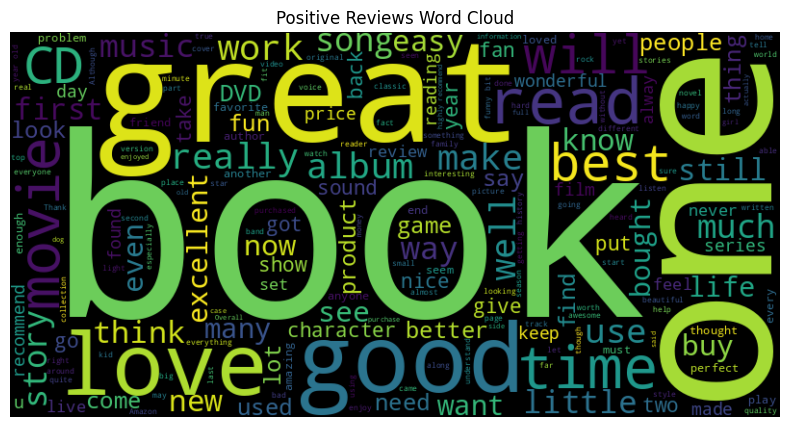

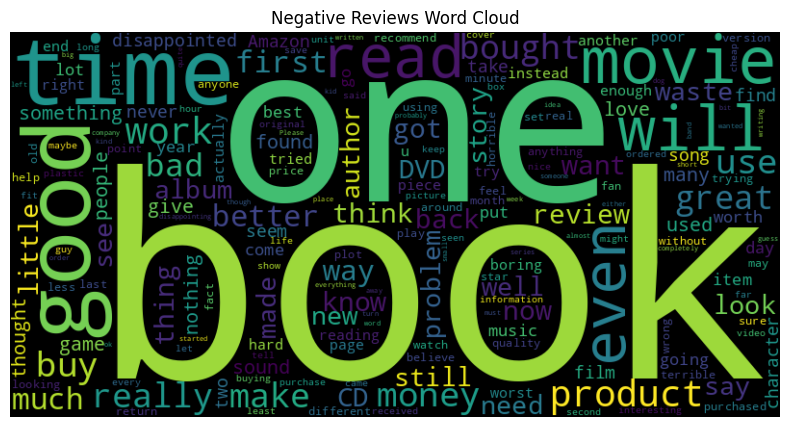

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

# Positive reviews
train_df1 = train_df.sample(n=10000, random_state=42)  # Smaller subset
positive_text = ' '.join(train_df1[train_df1['sentiment'] == 'positive']['processed_text'])
plot_wordcloud(positive_text, 'Positive Reviews Word Cloud')

# Negative reviews
negative_text = ' '.join(train_df1[train_df1['sentiment'] == 'negative']['processed_text'])
plot_wordcloud(negative_text, 'Negative Reviews Word Cloud')

### **Top Frequent Words**

In [ ]:
from collections import Counter

def get_top_words(text_series, n=10):
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)
train_df1 = train_df.sample(n=10000, random_state=42)  # Smaller subset
print("Top Positive Words:", get_top_words(train_df1[train_df1['sentiment'] == 'positive']['processed_text']))
print("Top Negative Words:", get_top_words(train_df1[train_df1['sentiment'] == 'negative']['processed_text']))

Top Positive Words: [('the', 15957), ('and', 10907), ('a', 9336), ('to', 8867), ('I', 8533), ('of', 7911), ('is', 6963), ('this', 4856), ('it', 4760), ('for', 4326)]
Top Negative Words: [('the', 17190), ('I', 9997), ('to', 9678), ('and', 9299), ('a', 9187), ('of', 7251), ('is', 6285), ('it', 5847), ('this', 5487), ('in', 3982)]


In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid =SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [27]:
train_df['scores'] = train_df['processed_text'].apply(lambda rv: sid.polarity_scores(rv))
train_df['compound'] = train_df['scores'].apply(lambda s:s['compound'])
train_df['compound_score'] = train_df['compound'].apply(lambda score: 2 if score >= 0 else 1)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
accuracy_score(train_df['label'], train_df['compound_score'])

0.7116711671167116

In [30]:
classification_report(train_df['label'], train_df['compound_score'])

'              precision    recall  f1-score   support\n\n           1       0.87      0.49      0.63      4954\n           2       0.65      0.93      0.76      5045\n\n    accuracy                           0.71      9999\n   macro avg       0.76      0.71      0.70      9999\nweighted avg       0.76      0.71      0.70      9999\n'

In [31]:
confusion_matrix(train_df['label'], train_df['compound_score'])

array([[2429, 2525],
       [ 358, 4687]])

In [35]:
sid.polarity_scores("And that was about it. The first hour was filled with talking about the research team that landed on the planet. When the aliens attacked, they did things that any idiot would never do and they just died. The only character that I actually liked was the one who had the weird eyes (the killer). The creators also didn't put into account that the aliens were hurt by light. Only once did the light bother them, and that one was already dead. The only reason that I gave this 2 stars was because the special effects saved it. The rest was stupid. My suggestion is to never see this movie...ever.")

{'neg': 0.194, 'neu': 0.742, 'pos': 0.064, 'compound': -0.9501}